In [9]:
import torch
import os
from datasets import Dataset
from transformer_lens import HookedTransformer

from core.utils.feature_activation import draw_feature_density

os.environ["https_proxy"] = "http://localhost:7890"

Loading dataset from disk:   0%|          | 0/1024 [00:00<?, ?it/s]

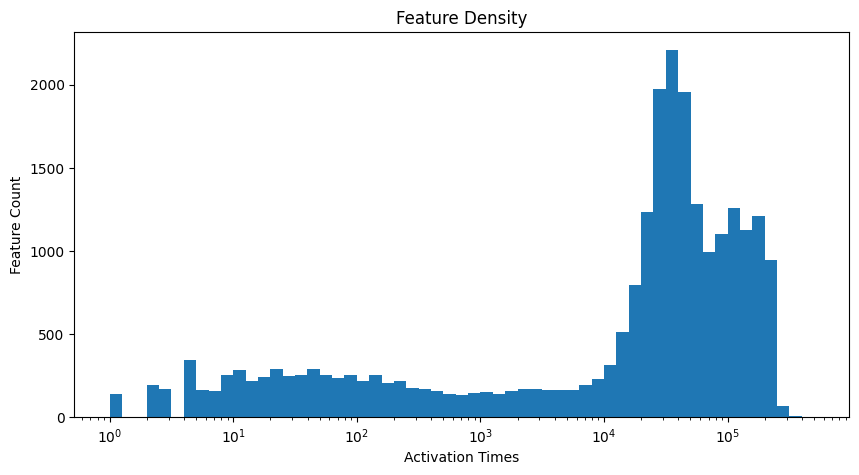

In [14]:
feature_activations = Dataset.load_from_disk("analysis/test")
draw_feature_density(torch.tensor(feature_activations["act_times"], device="cuda"), "density.png")

In [15]:
model = HookedTransformer.from_pretrained('gpt2', device="cuda")
model.eval()

Loaded pretrained model gpt2 into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (pos_embed): PosEmbed()
  (hook_pos_embed): HookPoint()
  (blocks): ModuleList(
    (0-11): 12 x TransformerBlock(
      (ln1): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): HookPoint()
      (hook_mlp_out): HookPoint()
      (h

In [16]:
import json

index = 6243

print(f"Index: {index}")

feature_activation = feature_activations[index]

act_times = feature_activation["act_times"]
print(f"Activation times: {act_times}")
for j in range(150):
    contexts = torch.tensor(feature_activation["contexts"][j], device="cuda")
    activated = torch.tensor(feature_activation["feature_acts"][j], device="cuda").nonzero(as_tuple=True)[0]
    print(f"Context: ", json.dumps(model.tokenizer.decode(contexts)))
    print(f"Activated tokens: ", json.dumps(model.to_str_tokens(contexts[activated])))

Index: 6243
Activation times: 22297
Context:  "Remember April 22, when the US U-23 Men's National Team took on Mexico in Carson, California and won 3-0? Of course you do, because the game involved about 50 minutes of the New York Red Bulls' own Dan Metzger.\n\nHe wasn't in the starting lineup, but injuries to Alejandro Guido and Jose Villareal forced head coach Andi Herzog into some unexpected substitutions: Metzger was on the pitch from the 40th minute.\n\nRBNY fans can expect to see Metzger play for NYRB II most weeks. He signed a USL contract with the Red Bulls' development squad, which means he isn't one of those players who can easily bounce between RBNY's MLS roster and its USL team. But he has been getting call-ups for the U-23s recently, and if that continues, he'll be in the mix for a shot at CONCACAF Olympic qualifying in October. And if the U-23s make the Olympic tournament, he should at least be considered for that squad, regardless of what happens this year (because the Br